In [1]:
# This Python notebook was used for creating a support vector machine to classify oligodendroglioma from normal samples, as well as compare the SVM with other machine learning models

# importing all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [2]:
# read in the metadata for oligodendroglioma
metadata = pd.read_csv('interesting_metadata_for_oligo_vs_normal.csv')
metadata = metadata[["Unnamed: 0", "tumor"]]
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,tumor
GSM2899558,normal
GSM2899559,normal
GSM2899560,normal
GSM2899561,normal
GSM2899562,normal
...,...
GSM97949,oligodendroglioma
GSM97956,oligodendroglioma
GSM97962,oligodendroglioma
GSM97964,oligodendroglioma


In [3]:
# get the number of samples for each label
metadata["tumor"].value_counts()

oligodendroglioma    117
normal                51
Name: tumor, dtype: int64

In [7]:
# read in the expression values for oligodendroglioma using data wrangling
df = pd.read_csv('interesting_genes_expressions_for_oligo_vs_normal.csv')
df = df.drop(columns={'Unnamed: 0'})
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[168])
df_transposed.drop(index=df_transposed.index[168], 
        axis=0, 
        inplace=True)
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,tumor,CREG2,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,MYT1L,PALM2AKAP2,ZNF385B,...,PDE1A,ARHGEF7,KRT222,GABRA1,HTR2A,NaN,NEFH,PHF24,PPP1R16B,FERMT1
GSM2899558,normal,9.851671,8.362494,10.671862,7.018926,8.996324,8.427248,7.591996,7.780938,7.14333,...,7.928691,9.883658,9.042614,10.500672,9.641306,8.402532,9.567037,9.354607,10.082158,7.101034
GSM2899559,normal,10.004868,8.514118,10.774532,6.265091,9.206954,8.561028,8.66956,7.695347,6.765222,...,8.862359,9.701488,8.098819,10.542419,9.495524,7.767477,8.744901,9.297281,10.151204,7.223274
GSM2899560,normal,10.082971,8.117597,11.024331,5.668174,9.102236,8.218835,9.025794,7.571697,7.051955,...,8.086636,9.364249,8.018005,10.657301,9.144482,7.002602,9.765754,8.893805,9.825098,6.898798
GSM2899561,normal,9.613305,8.337773,10.418179,5.534756,8.519577,8.191908,7.66378,7.490396,6.907394,...,8.103343,9.176542,8.369438,9.848985,9.500753,8.079844,9.138567,8.461969,9.779112,7.256169
GSM2899562,normal,8.457482,8.695391,11.186727,7.716112,8.684439,8.094604,8.846499,8.851955,7.658566,...,8.733817,10.535769,7.323901,11.593391,9.951097,8.282525,9.287942,9.291152,10.651021,7.088356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM97949,oligodendroglioma,9.027686,9.300857,11.115386,6.975324,9.424444,8.94623,9.083982,7.286302,7.863392,...,8.438254,9.75556,8.342702,11.519143,9.686889,8.828929,9.811604,9.091557,10.517268,7.769258
GSM97956,oligodendroglioma,6.994399,6.047246,8.573914,4.726631,6.26679,5.337717,6.648777,5.483084,5.225153,...,6.362447,8.035177,5.226744,8.096293,8.161451,11.185226,7.276039,6.549953,8.619844,11.390267
GSM97962,oligodendroglioma,7.67684,6.061922,8.23299,4.665596,5.98233,5.211924,5.478844,5.092967,4.662381,...,6.592222,8.102213,5.208956,7.827442,7.164248,11.299513,7.164679,6.751209,8.282735,11.338484
GSM97964,oligodendroglioma,6.142205,5.946772,8.656033,5.024079,5.851491,5.35864,7.25225,5.139143,5.072622,...,5.987614,7.60209,5.295106,8.20263,6.381401,10.761082,7.36401,6.643271,8.456142,11.411


In [8]:
# make sure there are no null values in the dataset
df.isnull().sum()

tumor       0
CREG2       0
SLC39A12    0
RBFOX1      0
DNAJA4      0
           ..
NaN         0
NEFH        0
PHF24       0
PPP1R16B    0
FERMT1      0
Length: 372, dtype: int64

In [9]:
# print if there are missing values
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [10]:
# Encoding categorical values as either 0's or 1's
df['tumor'] = df['tumor'].replace({'normal':0,'oligodendroglioma':1,'Other':-1}).astype(np.uint8)

In [11]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',51/(51+167))
print('Null Accuracy: ',167/(167+51))

Inverse of Null Accuracy:  0.23394495412844038
Null Accuracy:  0.7660550458715596


In [12]:
# reset the index so as to remove the name of the sample
df.reset_index(inplace=True)
df

,index,tumor,CREG2,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,MYT1L,PALM2AKAP2,...,PDE1A,ARHGEF7,KRT222,GABRA1,HTR2A,NaN,NEFH,PHF24,PPP1R16B,FERMT1
0,GSM2899558,0,9.851671,8.362494,10.671862,7.018926,8.996324,8.427248,7.591996,7.780938,...,7.928691,9.883658,9.042614,10.500672,9.641306,8.402532,9.567037,9.354607,10.082158,7.101034
1,GSM2899559,0,10.004868,8.514118,10.774532,6.265091,9.206954,8.561028,8.66956,7.695347,...,8.862359,9.701488,8.098819,10.542419,9.495524,7.767477,8.744901,9.297281,10.151204,7.223274
2,GSM2899560,0,10.082971,8.117597,11.024331,5.668174,9.102236,8.218835,9.025794,7.571697,...,8.086636,9.364249,8.018005,10.657301,9.144482,7.002602,9.765754,8.893805,9.825098,6.898798
3,GSM2899561,0,9.613305,8.337773,10.418179,5.534756,8.519577,8.191908,7.66378,7.490396,...,8.103343,9.176542,8.369438,9.848985,9.500753,8.079844,9.138567,8.461969,9.779112,7.256169
4,GSM2899562,0,8.457482,8.695391,11.186727,7.716112,8.684439,8.094604,8.846499,8.851955,...,8.733817,10.535769,7.323901,11.593391,9.951097,8.282525,9.287942,9.291152,10.651021,7.088356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,GSM97949,1,9.027686,9.300857,11.115386,6.975324,9.424444,8.94623,9.083982,7.286302,...,8.438254,9.75556,8.342702,11.519143,9.686889,8.828929,9.811604,9.091557,10.517268,7.769258
164,GSM97956,1,6.994399,6.047246,8.573914,4.726631,6.26679,5.337717,6.648777,5.483084,...,6.362447,8.035177,5.226744,8.096293,8.161451,11.185226,7.276039,6.549953,8.619844,11.390267
165,GSM97962,1,7.67684,6.061922,8.23299,4.665596,5.98233,5.211924,5.478844,5.092967,...,6.592222,8.102213,5.208956,7.827442,7.164248,11.299513,7.164679,6.751209,8.282735,11.338484
166,GSM97964,1,6.142205,5.946772,8.656033,5.024079,5.851491,5.35864,7.25225,5.139143,...,5.987614,7.60209,5.295106,8.20263,6.381401,10.761082,7.36401,6.643271,8.456142,11.411


In [13]:
# get the x values and y values
X = df.drop(['tumor', 'index'], axis=1)
y = df['tumor']

from sklearn.model_selection import train_test_split

# split the data with 70-30 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [14]:
# import more libraries for neural networks
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Scale our data in pipeline, then split, for each model
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier())])
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier())])
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier())])

In [15]:
# do cross validation
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')
knn_cv = cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1')
dt_cv = cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1')
nn_cv = cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1')

In [16]:
# get the mean F1 scores
import warnings
warnings.filterwarnings("ignore")

print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('KNN mean :',cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Decision Tree mean :',cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Neural Network mean :',cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9657142857142856
SVM mean : 0.9657142857142856
Logistic Regression mean : 0.9800000000000001
KNN mean : 0.9657142857142856
Decision Tree mean : 0.946031746031746
Neural Network mean : 0.9466666666666667


In [17]:
# fit all models to the data 
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

# get the predictions from the test data 
rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

# get all confusion matrices by comparing the predictions to the actual labels 
rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score, classification_report, accuracy_score

# calculate the f1 score again
rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [18]:
# print the new F1 scores
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)
print('KNN mean :', knn_f1)
print('DT mean :', dt_f1)
print('NN mean :', nn_f1)

Mean f1 scores:
RF mean : 0.9299363057324841
SVM mean : 0.9150326797385621
LR mean : 0.948051948051948
KNN mean : 0.9150326797385621
DT mean : 0.9150326797385621
NN mean : 0.9150326797385621


In [19]:
# import GridSearchCV for best params for each model 
from sklearn.model_selection import GridSearchCV

# random forest classifier
n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

# the parameters that will be cycled through
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [25]:
# make the random forest classifier with NO parameters
rfc = RandomForestClassifier()

# fit the random forest classifier
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]})

In [26]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9600


Parameters that give the best results : 

 {'bootstrap': True, 'max_features': 2, 'n_estimators': 64}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_features=2, n_estimators=64)


In [44]:
# Let's use those params now
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(max_features=2, n_estimators=64))])

rf_pipeline.fit(X_train,y_train) # train the data

rf_tuned_pred = rf_pipeline.predict(X_test) # get the new predicted labels

In [45]:
# print out the classification report (Random Forest Classifier)
print(classification_report(y_test,rf_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_tuned_pred))
print('F1 Score: ',f1_score(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.96      0.86      0.91        81

    accuracy                           0.88       118
   macro avg       0.86      0.89      0.87       118
weighted avg       0.90      0.88      0.88       118

Accuracy Score:  0.8813559322033898
F1 Score:  0.9090909090909091


In [46]:
# do logistic regression now
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

# here are the parameters used for logistic regression
log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [47]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9800


Parameters that give the best results : 

 {'C': 0.1, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1)


In [48]:
# Let's use those params now
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1))])

logreg_pipeline.fit(X_train,y_train) # train the data

logreg_tuned_pred = logreg_pipeline.predict(X_test) # get new predicted values

In [49]:
# print the results (Logistic Regression)
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.97      0.90      0.94        81

    accuracy                           0.92       118
   macro avg       0.89      0.92      0.91       118
weighted avg       0.92      0.92      0.92       118

Accuracy Score:  0.9152542372881356
F1 Score:  0.935897435897436


In [ ]:
# do SVMs now
svm_param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

svm = SVC(random_state=42)

grid = GridSearchCV(estimator = svm,  
                           param_grid = svm_param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid.fit(X_train,y_train) # fit the grid to find the best parameters

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear', random_state=42)


In [50]:
# use these new params now
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1,kernel='linear',random_state=42))])

svm_pipeline.fit(X_train,y_train) 

svm_tuned_pred = svm_pipeline.predict(X_test)

In [51]:
# print the results for the support vector machines
print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.90      0.95        81

    accuracy                           0.93       118
   macro avg       0.91      0.95      0.93       118
weighted avg       0.94      0.93      0.93       118

Accuracy Score:  0.9322033898305084
F1 Score:  0.948051948051948


In [ ]:
# next up is k-nearest-neighbors
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'n_neighbors': 3}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=3)


In [52]:
# using the optimal parameters
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=1))])

knn_pipeline.fit(X_train,y_train)

knn_tuned_pred = knn_pipeline.predict(X_test)

In [53]:
# print out the report for the knn classifier
print(classification_report(y_test,knn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,knn_tuned_pred))
print('F1 Score: ',f1_score(y_test,knn_tuned_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.97      0.91      0.94        81

    accuracy                           0.92       118
   macro avg       0.90      0.93      0.91       118
weighted avg       0.93      0.92      0.92       118

Accuracy Score:  0.923728813559322
F1 Score:  0.9426751592356688


In [ ]:
# next up is decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,10), 
          'min_samples_leaf': range(1,5)}

grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9857


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=1, random_state=42)


In [54]:
# lets use these params now
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(max_depth=1, random_state=42))])

dt_pipeline.fit(X_train,y_train)

dt_tuned_pred = dt_pipeline.predict(X_test)

In [55]:
# print out the report for the decision tree classifier
print(classification_report(y_test,dt_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,dt_tuned_pred))
print('F1 Score: ',f1_score(y_test,dt_tuned_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.97      0.94      0.96        81

    accuracy                           0.94       118
   macro avg       0.92      0.94      0.93       118
weighted avg       0.94      0.94      0.94       118

Accuracy Score:  0.940677966101695
F1 Score:  0.9559748427672956


In [ ]:
# using a multilayer perceptron neural network
mlp = MLPClassifier(random_state=42)

params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

grid = GridSearchCV(mlp, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'}


Estimator that was chosen by the search : 

 MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0,
              solver='lbfgs')


In [39]:
# lets use these params now
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0,
              solver='lbfgs'))])

nn_pipeline.fit(X_train,y_train)

nn_tuned_pred = nn_pipeline.predict(X_test)

In [40]:
# print out the results for the neural network 
print(classification_report(y_test,nn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,nn_tuned_pred))
print('F1 Score: ',f1_score(y_test,nn_tuned_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.90      0.95        81

    accuracy                           0.93       118
   macro avg       0.91      0.95      0.93       118
weighted avg       0.94      0.93      0.93       118

Accuracy Score:  0.9322033898305084
F1 Score:  0.948051948051948


In [41]:
# fit all of these new models
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

# get the prediction labels from the new models
rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

# create new confusion matrices
rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

In [42]:
# Make dataframes to plot
from sklearn.metrics import recall_score, precision_score, roc_auc_score

# random forest classifier
rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

# support vector machine
svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

# logistic regression
lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

# k nearest neighbors
knn_df = pd.DataFrame(data=[f1_score(y_test,knn_tuned_pred),accuracy_score(y_test, knn_tuned_pred), recall_score(y_test, knn_tuned_pred),
                   precision_score(y_test, knn_tuned_pred), roc_auc_score(y_test, knn_tuned_pred)], 
             columns=['K-Nearest-Neighbors Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

# decision tree classifier
dt_df = pd.DataFrame(data=[f1_score(y_test,dt_tuned_pred),accuracy_score(y_test, dt_tuned_pred), recall_score(y_test, dt_tuned_pred),
                   precision_score(y_test, dt_tuned_pred), roc_auc_score(y_test, dt_tuned_pred)], 
             columns=['Decision Tree Classifier Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

# multilayer perceptron neural network
nn_df = pd.DataFrame(data=[f1_score(y_test,nn_tuned_pred),accuracy_score(y_test, nn_tuned_pred), recall_score(y_test, nn_tuned_pred),
                   precision_score(y_test, nn_tuned_pred), roc_auc_score(y_test, nn_tuned_pred)], 
             columns=['Multilayer Perceptron Neural Network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [ ]:
# create a full figure
df_models = round(pd.concat([rf_df,svm_df,lr_df,knn_df, dt_df, nn_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"] # the colors for the plot
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors) # make the color map from minimum to maximum

fig = plt.figure(figsize=(15,30)) # create figure
gs = fig.add_gridspec(4, 2) # add some space between the grid elements
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0.80,vmax=1, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":18}) # create the heatmap using seaborn

ax0.text(0,-0.5,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif') # set the text
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

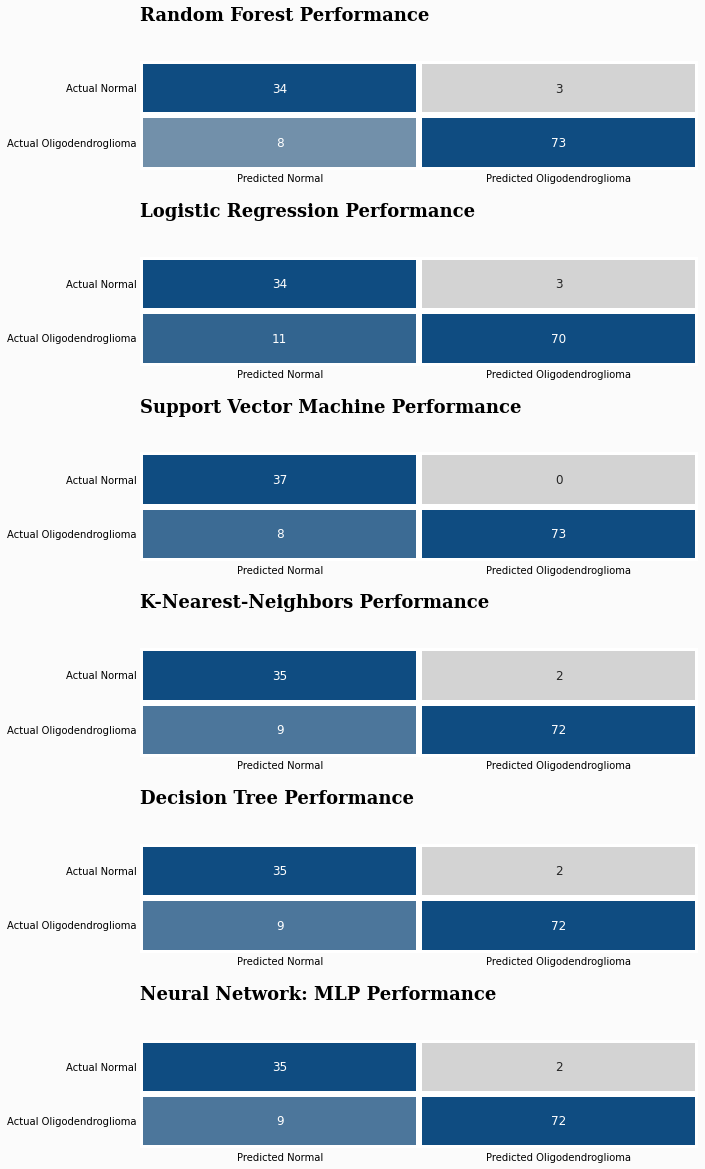

In [59]:
# Plotting our results and confusion matrices (and making them look professional)
colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# add all of our subplots
fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(6, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, :])
ax4 = fig.add_subplot(gs[4, :])
ax5 = fig.add_subplot(gs[5, :])

# random forest classifier
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# logistic regression
sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# support vector machines
sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# k nearest neighbors
sns.heatmap(knn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax3,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# decision tree classifier
sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax4,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# multilayer perceptron neural network
sns.heatmap(nn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax5,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

# set the background color for each figure
ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax3.set_facecolor(background_color)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.set_facecolor(background_color)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax5.set_facecolor(background_color)

# set the text for each figure
ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax3.text(0,-0.75,'K-Nearest-Neighbors Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax4.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax5.text(0,-0.75,'Neural Network: MLP Performance',fontsize=18,fontweight='bold',fontfamily='serif')

plt.show()